In [1]:
#Medical Cost Personal Dataset form sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression# r2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [3]:
dataset = pd.read_csv('medical_insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# dataset['sex'] = dataset['sex']({0: 'female', 1: 'male'})
# dataset['smoker'] = dataset['smoker'].map({0: 'no', 1: 'yes'})
# dataset['region'] = dataset['region'].map({0: 'southwest', 1: 'northwest'})

dataset_dummies_sex = pd.get_dummies(dataset['sex'])
dataset_dummies_smoker = pd.get_dummies(dataset['smoker'],prefix='smoker')
dataset_dummies_region = pd.get_dummies(dataset['region'])

dataset = dataset.drop('sex', axis = 1)
dataset = dataset.drop('smoker', axis = 1)
dataset = dataset.drop('region', axis = 1)
dataset = pd.concat([dataset, dataset_dummies_sex,dataset_dummies_smoker,dataset_dummies_region], axis = 1)

In [6]:
dataset

,age,bmi,children,charges,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


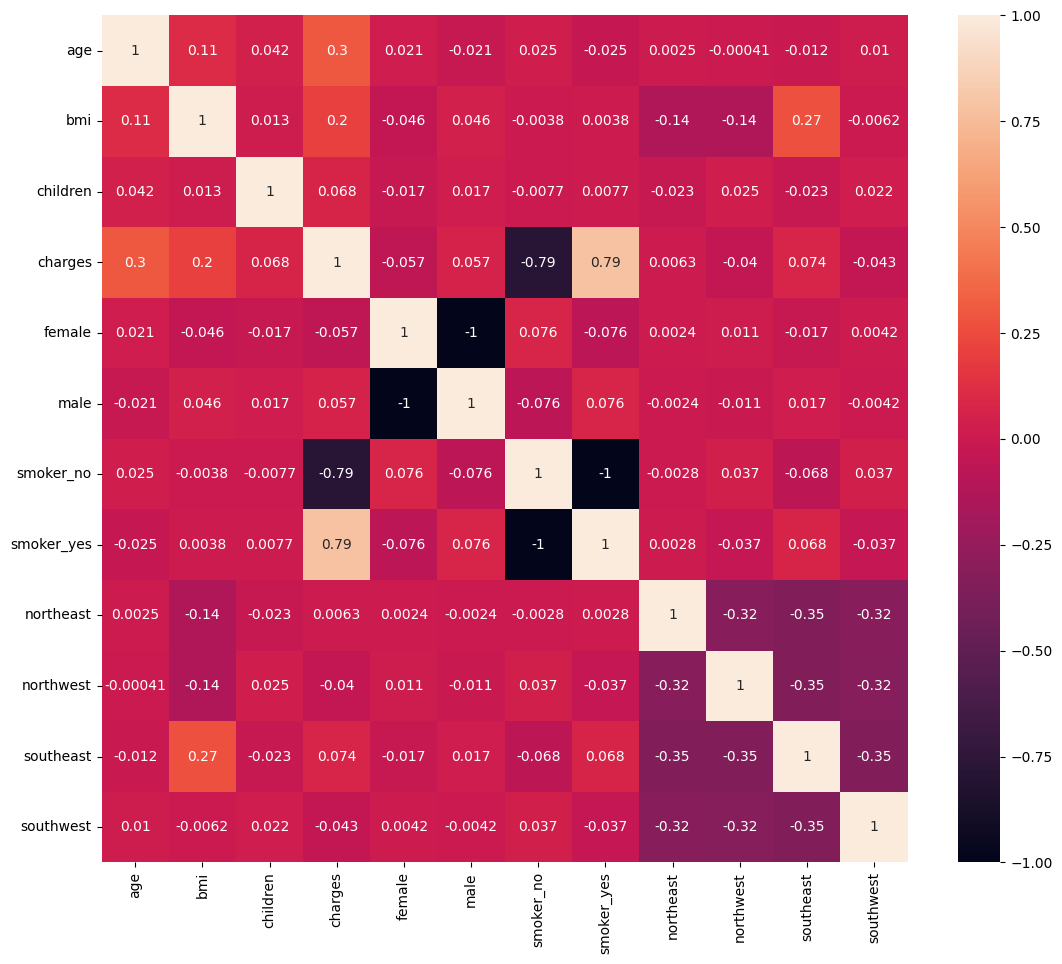

In [7]:
plt.figure(figsize=(13, 11))
sns.heatmap(dataset.corr(), annot=True,)
None

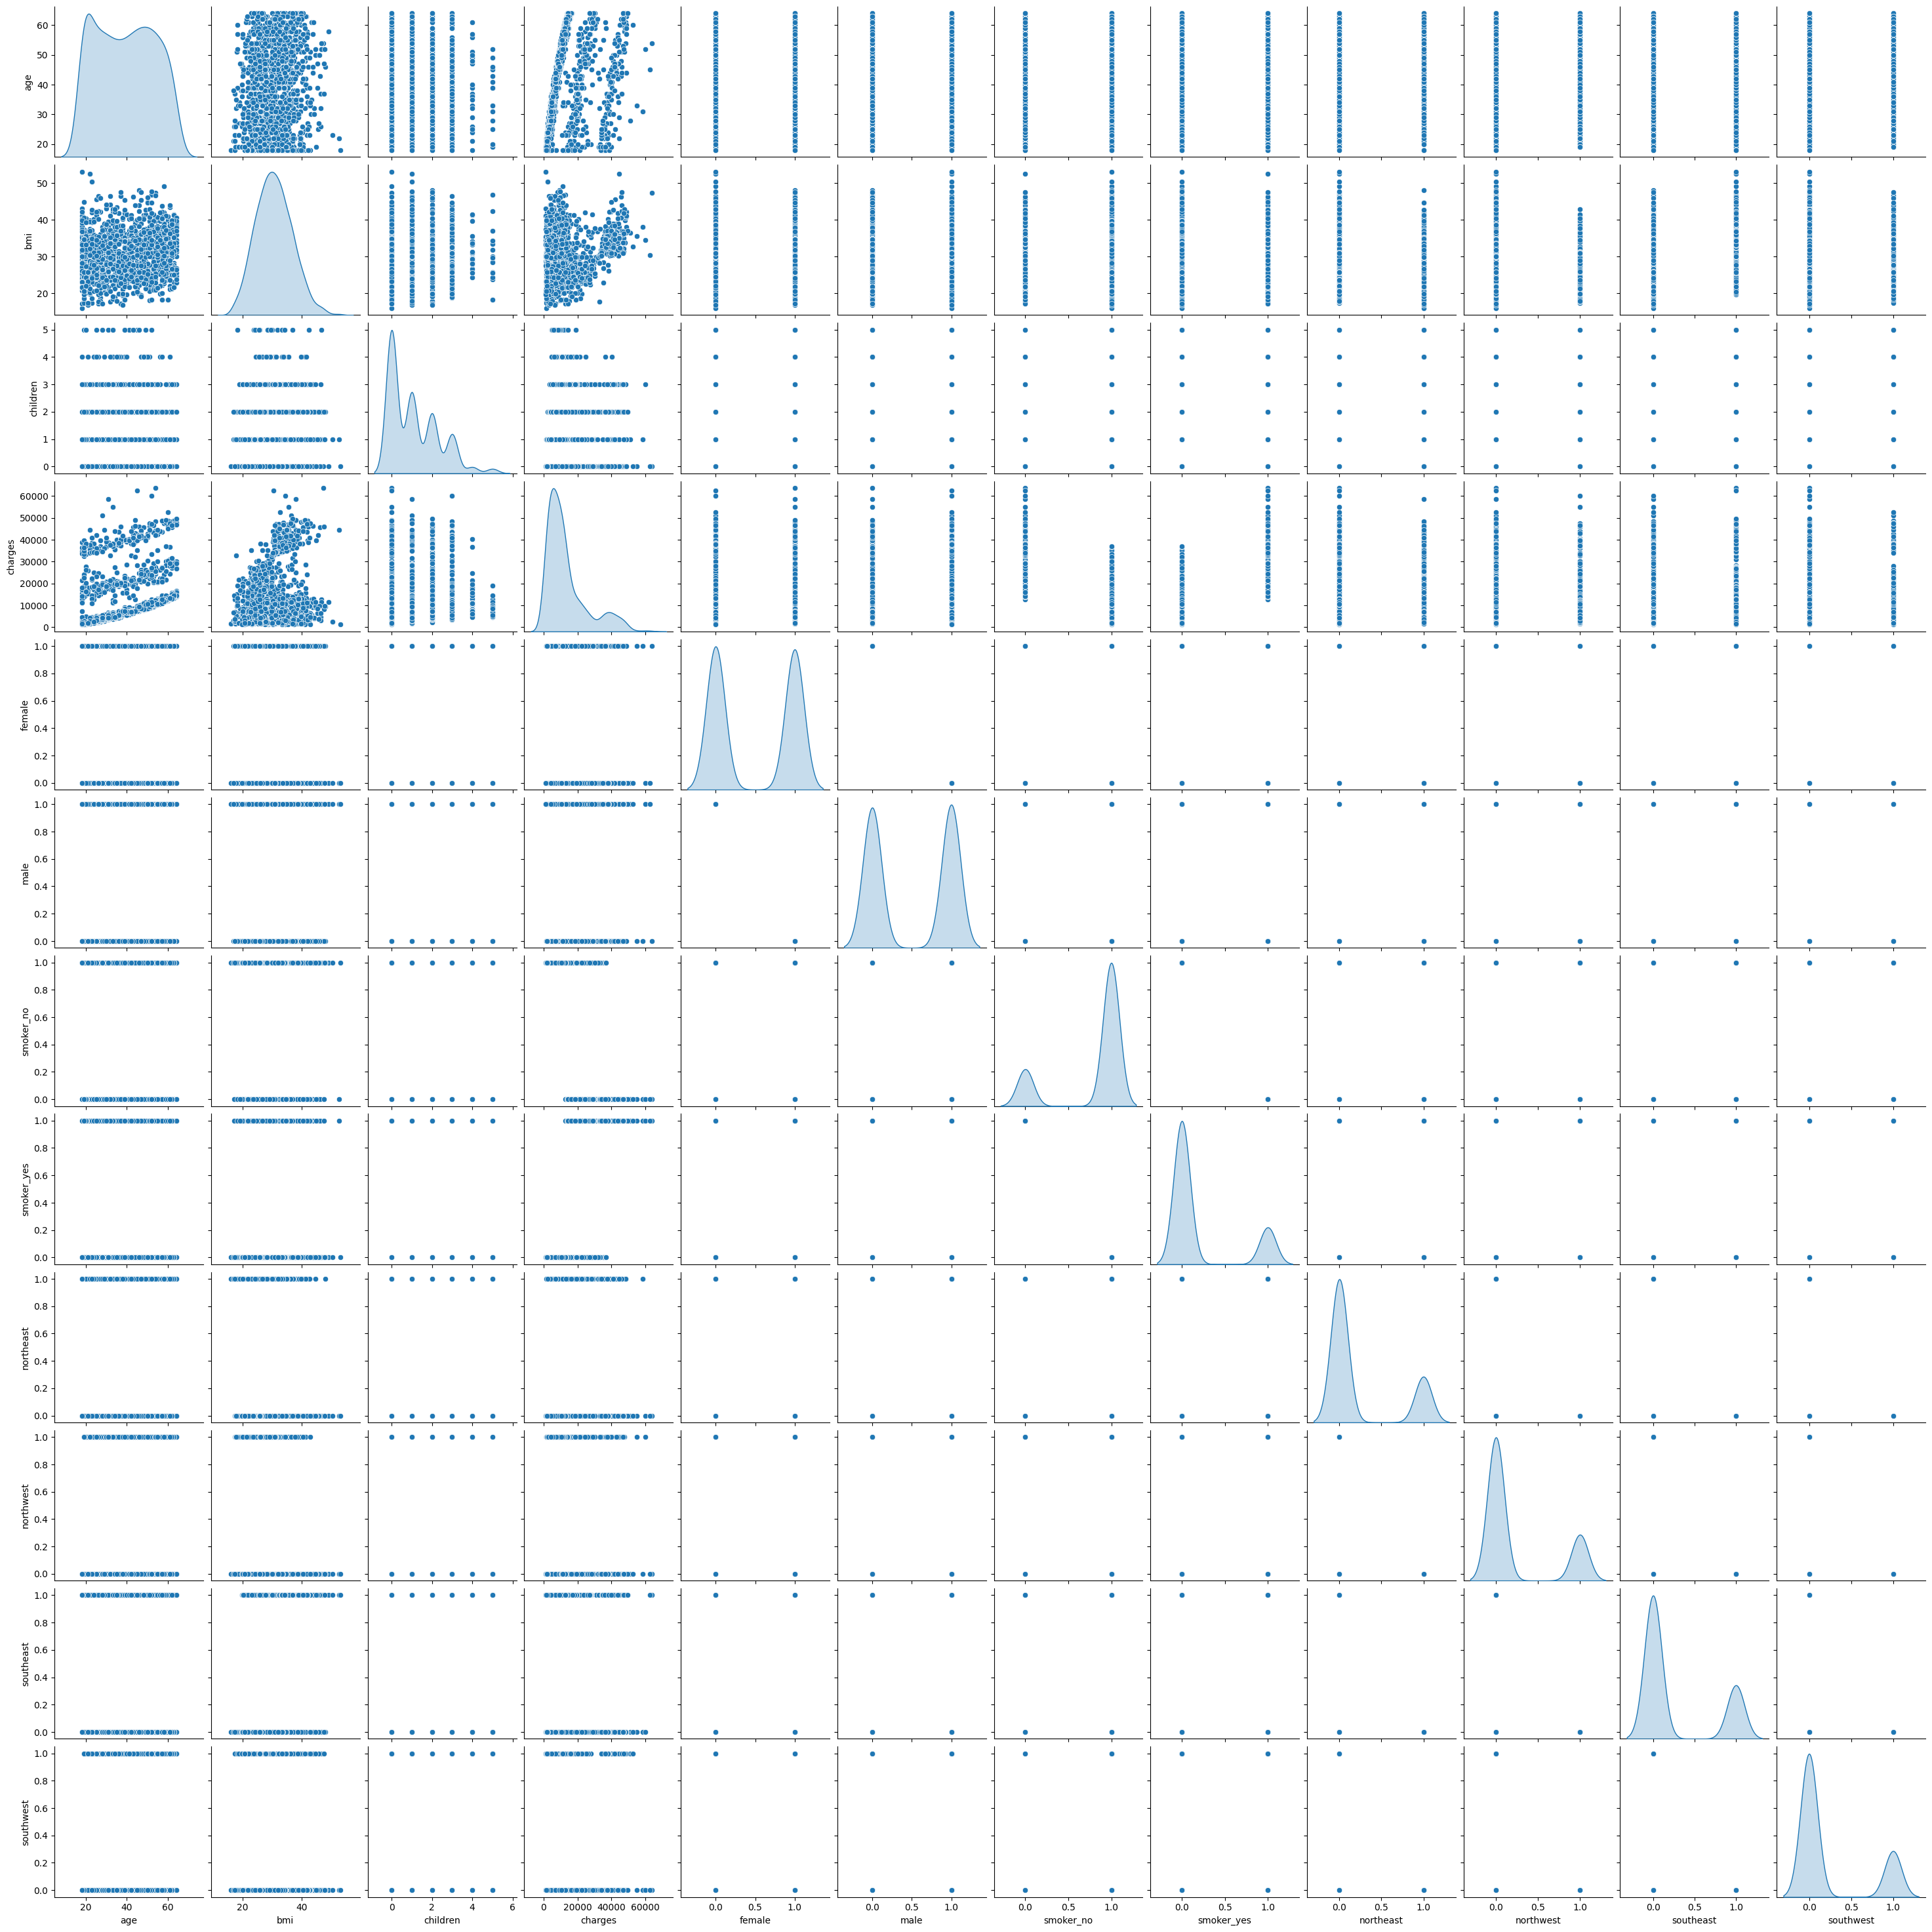

In [8]:
sns.pairplot(dataset[[
    "age", 
    "bmi", 
    "children", 
    "charges",
    "female",
    "male",
    "smoker_no",
    "smoker_yes",
    "northeast",
    "northwest",
    "southeast",
    "southwest"
]],
             diag_kind="kde")
None

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
# StandardScaler
standard_scaler = StandardScaler()

In [10]:
data_standard = standard_scaler.fit_transform(dataset)
data_standard

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [11]:
#Regularization
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [12]:
X = dataset.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]].values
y = dataset.iloc[:,[3]].values

In [13]:
X

array([[19, 27.9, 0, ..., False, False, True],
       [18, 33.77, 1, ..., False, True, False],
       [28, 33.0, 3, ..., False, True, False],
       ...,
       [18, 36.85, 0, ..., False, True, False],
       [21, 25.8, 0, ..., False, False, True],
       [61, 29.07, 0, ..., True, False, False]], dtype=object)

In [14]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [15]:
#X test is the 30% of rows the rest 70% is the training test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 11)
(402, 11)
(936, 1)
(402, 1)


In [18]:

# run a linear to the dataset
model = LinearRegression()
model.fit(X_train, y_train)
#  βο
model.intercept_
#  β1
model.coef_
y_pred = model.predict(X_test)
print('Mean Squared Error :', mean_squared_error(y_test, y_pred,squared=False))
print('R2 score : ', r2_score(y_test, y_pred))

Mean Squared Error : 5812.100272258869
R2 score :  0.7696118054369012


In [19]:
cross_val_score(model,X,y,cv=10)

array([0.78599896, 0.73249853, 0.73491249, 0.66880787, 0.77174242,
       0.78401994, 0.79314562, 0.66869189, 0.74242455, 0.76276472])

In [20]:
#X test is the 30% of rows the rest 70% is the training test
#2nd model
X2 = dataset.iloc[:,[6,7]].values
y2 = dataset.iloc[:,[3]].values
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.30,random_state=1)
# run a linear to the dataset
model = LinearRegression()
model.fit(X_train, y_train)
#  βο
model.intercept_
#  β1
model.coef_
y_pred_2 = model.predict(X_test)
print('Mean Squared Error :', mean_squared_error(y_test, y_pred_2,squared=False))
print('R2 score : ', r2_score(y_test, y_pred_2))

Mean Squared Error : 7671.165347968523
R2 score :  0.5847575547464803


In [22]:
cross_val_score(model,X2,y2,cv=10)

array([0.65209528, 0.56901373, 0.6042407 , 0.54652529, 0.64331665,
       0.63055247, 0.66899891, 0.53606569, 0.67430414, 0.6266156 ])

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr.coef_

array([[7.65746973e+15, 7.65746973e+15]])

In [25]:
lr.intercept_

array([-7.65746973e+15])

In [26]:
len(lr.intercept_)

1

In [27]:
lasso = Lasso()

In [28]:
lasso.fit(X_train, y_train)

Lasso()

In [29]:
lasso.coef_

array([-23983.35043998,      0.        ])